# Gradient Decent

## Lecture 9

### GRA 4160
### Predictive modelling with machine learning

#### Lecturer: Vegard H. Larsen

## Batch Gradient Descent vs Stochastic Gradient Descent

A batch refers to a subset of the dataset used to update the model's parameters during training.
The batch size is the number of data points in a batch.

There are different gradient descent algorithms based on batch size:

1. Batch Gradient Descent: The entire dataset is used for each parameter update. This can lead to more accurate updates but is computationally expensive, especially for large datasets.
2. Stochastic Gradient Descent (SGD): A single data point is used for each parameter update. This is computationally efficient but can result in noisy and less accurate updates.

## Epochs

An epoch is a single iteration through the entire dataset during training of a model.
During an epoch, the model processes each data point or batch of data points and updates its parameters based on the calculated gradients.
The purpose of multiple epochs is to improve the model's performance iteratively by refining its parameters on the same dataset.

E.g, if you have a dataset of 1,000 data points, and you use a batch size of 100, each epoch would consist of 10 iterations (batches) through the dataset.
If you run the training for 50 epochs, the model would have gone through the dataset 50 times, updating its parameters on each pass.
Typically, the model's performance improves with more epochs, up to a certain point, after which it may start to overfit the training data.

## Learning rate

The learning rate is a hyperparameter that determines the step size for updating the model's parameters during training.
It controls how much the model's parameters are adjusted in response to the calculated gradients for each update.

A smaller learning rate leads to smaller steps, which can result in a slower convergence towards the optimal solution, but it may provide more accurate parameter updates.
A larger learning rate, leads to bigger steps, which can speed up the convergence process but may overshoot the optimal solution or cause the model to oscillate between different solutions.

Choosing an appropriate learning rate is crucial for the successful training of a machine learning model.
If the learning rate is too small, the model might take a long time to converge or get stuck in a suboptimal solution.
If the learning rate is too large, the model might fail to converge or diverge altogether.
Often, the learning rate is chosen through experimentation.

## Estimate a linear regression model with Stochastic Gradient Descent

This example below generates a synthetic dataset and applies Stochastic Gradient Descent to find the best-fit line using linear regression.
The dataset contains 100 data points, and the model is trained for 50 epochs with a learning rate of 0.1.
The code calculates the gradients and updates the parameters $m$ and $b$ accordingly.
The final learned line is plotted along with the original data points.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset
np.random.seed(10)
x = np.random.rand(100, 1)
y = 4 + 3.8 * x + np.random.randn(100, 1)

# Define the cost function (Mean Squared Error)
def cost_function(y_true, y_pred):
    # Calculate the mean squared error between the true values and predicted values
    return np.mean((y_true - y_pred)**2)

# Define the gradient function
def gradients(x, y, y_pred):
    n = len(y)
    # Calculate the gradients of the cost function with respect to m and b
    grad_m = -2/n * np.sum(x * (y - y_pred))
    grad_b = -2/n * np.sum(y - y_pred)
    return grad_m, grad_b

The `cost_function` calculates the mean squared error (MSE) between the true values (`y_true`) and predicted values (`y_pred`).
The MSE is a commonly used cost function in regression problems and measures the average squared difference between the predicted and true values. 
The smaller the MSE, the better the model performance.

The `gradients` function calculates the gradients of the cost function with respect to the model parameters (in this case, the slope $m$ and intercept $b$ of a linear regression model).
These gradients are used by an optimizer (such as stochastic gradient descent) to update the parameters during training, in order to minimize the cost function and improve the model performance.

In [7]:
# Stochastic Gradient Descent

def sgd(x, y, learning_rate=0.1, n_epochs=50):
    # Initialize the slope and intercept with random values
    m = np.random.randn(1)
    b = np.random.randn(1)
    n = len(y)

    # Loop over the specified number of epochs
    for epoch in range(n_epochs):
        # Shuffle the indices to randomly sample the data
        shuffled_indices = np.random.permutation(n)
        x_shuffled = x[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        # Loop over the data in batches (in this one piece at a time)
        for i in range(0, n, 1):
            # Select a batch of data
            x_batch = x_shuffled[i:i+1]
            y_batch = y_shuffled[i:i+1]

            # Predict the output values using the current parameters
            y_pred = m * x_batch + b

            # Calculate the gradients of the cost function with respect to m and b
            grad_m, grad_b = gradients(x_batch, y_batch, y_pred)

            # Update the parameters using the gradients and learning rate
            m -= learning_rate * grad_m
            b -= learning_rate * grad_b

    # Return the final parameters
    return m, b

In [8]:
def full_batch_gradient_descent(x, y, learning_rate=0.1, n_epochs=50):
    # Initialize the slope and intercept with random values
    m = np.random.randn(1)
    b = np.random.randn(1)
    n = len(y)

    # Loop over the specified number of epochs
    for epoch in range(n_epochs):
        # Predict the output values using the current parameters for the full batch
        y_pred = m * x + b

        # Calculate the gradients of the cost function with respect to m and b for the full batch
        grad_m, grad_b = gradients(x, y, y_pred)

        # Update the parameters using the gradients and learning rate
        m -= learning_rate * grad_m
        b -= learning_rate * grad_b

    # Return the final parameters
    return m, b

The sgd function implements the stochastic gradient descent (SGD) algorithm for linear regression.
SGD is an optimization algorithm that uses a small batch of randomly sampled data points to estimate the gradient of the cost function at each iteration.
It is often used in large-scale machine learning problems because it can be more computationally efficient than traditional batch gradient descent.

The function takes as input the input data x, the output data y, the learning rate learning_rate, the number of epochs n_epochs, and the batch size `batch_size`.
It initializes the slope m and intercept b with random values, shuffles the data randomly at each epoch, and loops over the data in batches of size `batch_size`.

For each batch of data, the function predicts the output values `y_pred` using the current parameter values, calculates the gradients of the cost function with respect to $m$ and $b$ using the gradients function, and updates the parameters using the gradients and learning rate.
This process is repeated for the specified number of epochs.

The function returns the final values of $m$ and $b$, which represent the optimal parameters of the linear regression model.

In [9]:
# Train the model
m, b = sgd(x, y)

# Make predictions
y_pred = m * x + b

# Calculate the cost
cost = cost_function(y, y_pred)
print(f"Final cost: {cost:.4f}")
print(f"Learned parameters: m={m[0]:.4f}, b={b[0]:.4f}")

Final cost: 1.0182
Learned parameters: m=3.3131, b=4.0983


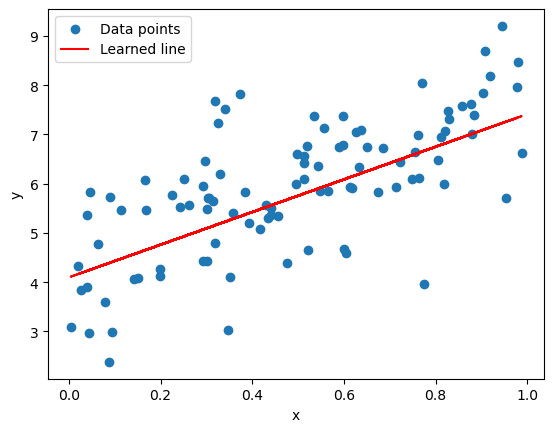

In [10]:
# Plot the data and the learned line
plt.scatter(x, y, label="Data points")
plt.plot(x, y_pred, color="red", label="Learned line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [11]:
# Train the model
m, b = full_batch_gradient_descent(x, y)

# Make predictions
y_pred = m * x + b

# Calculate the cost
cost = cost_function(y, y_pred)
print(f"Final cost: {cost:.4f}")
print(f"Learned parameters: m={m[0]:.4f}, b={b[0]:.4f}")

Final cost: 1.0709
Learned parameters: m=2.3030, b=4.8343


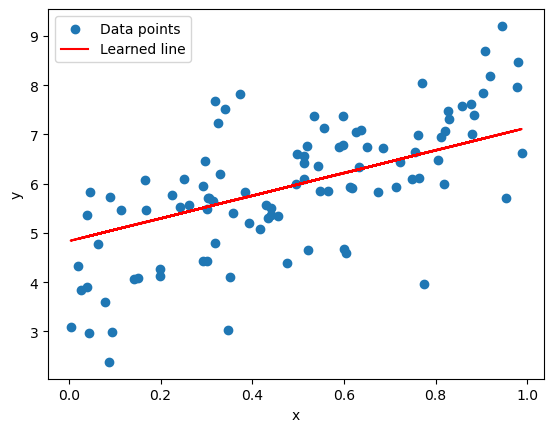

In [12]:
# Plot the data and the learned line
plt.scatter(x, y, label="Data points")
plt.plot(x, y_pred, color="red", label="Learned line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()